<a href="https://colab.research.google.com/github/pravincoder/Machine-Learning-Models-Tutorial/blob/main/GolfDataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Quality and Preprocessing

In [33]:
#!wget https://raw.githubusercontent.com/pravincoder/Machine-Learning-Models-Tutorial/refs/heads/main/golfdata%20-%20Sheet1-2.csv

In [34]:
import pandas as pd
import numpy as np

In [35]:
golf_data = pd.read_csv("/content/Copy of golfdata - Sheet1.csv")

In [36]:
golf_data.head()

,Course,Hole,Score,Shot Distance in Yards,Shot Outcome in Yards,Club Type,Mistake,Power,Above Below Break,Break,...,Date,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure in Inches,Precipitation,Condition
0,Heartwell,1,5,116,108,Driver,NaN,NaN,NaN,Drive,...,Sat 12/21/2024,60 °F,50 F,70%,6 mph Wind WSW,NaN,NaN,30.16,1%,Mostly Cloudy
1,Heartwell,1,5,8,5,SW,NaN,NaN,NaN,Chip,...,Sat 12/21/2024,60 °F,50 F,70%,6 mph Wind WSW,NaN,NaN,30.16,1%,Mostly Cloudy
2,Heartwell,1,5,3,3,Putter,NaN,NaN,Above Break,Putt,...,Sat 12/21/2024,60 °F,50 F,70%,6 mph Wind WSW,NaN,NaN,30.16,1%,Mostly Cloudy
3,Heartwell,2,6,112,70,Hybrid,Hit Left Tree,NaN,NaN,Drive,...,Sat 12/21/2024,60 °F,50 F,70%,6 mph Wind WSW,NaN,NaN,30.16,1%,Mostly Cloudy
4,Heartwell,2,6,42,50,PW,NaN,NaN,NaN,Drive,...,Sat 12/21/2024,60 °F,50 F,70%,6 mph Wind WSW,NaN,NaN,30.16,1%,Mostly Cloudy


In [37]:
golf_data.columns

Index(['Course', 'Hole', 'Score', 'Shot Distance in Yards',
       'Shot Outcome in Yards', 'Club Type', 'Mistake', 'Power',
       'Above Below Break', 'Break', 'Lie of the Ball', 'Made Green',
       'Made Hole', 'Made Fairway', 'Made Rough', 'Tee Time',
       'Tournament Yards', 'Date', 'Temperature', 'Dew Point', 'Humidity',
       'Wind', 'Wind Speed', 'Wind Gust', 'Pressure in Inches',
       'Precipitation', 'Condition'],
      dtype='object')

##Getting DataSet Ready for predicting "Club Type".

## Trim Dataset

In [38]:
# Texture Column is blank so drop it
#data = golf_data.drop(columns=['Texture of Ground'])

# Drop Course Column as its same for every row
data = golf_data.drop(columns=['Course'])

In [39]:
# check nan count in power column
nan_col = data['Power'].isna().sum()
rows,colm = data.shape
# Conclusion on power column
print(f"As Power columns has only has sample :- {rows-nan_col} rows , Let not consider it as feature for now")

# Check count of power column
data['Power'].value_counts()

As Power columns has only has sample :- 64 rows , Let not consider it as feature for now


,count
Power,
1 shoe,19
Large,13
large,12
small,11
1-2 shoe,3
1-2Shoe,1
Small,1
1-2shoe,1
Medium Large,1


In [40]:
# Droping all unwanted columns
data = data.drop(columns=['Mistake', 'Temperature', 'Humidity', 'Wind', 'Precipitation','Lie of the Ball',
  'Pressure in Inches', 'Dew Point', 'Date', 'Tee Time','Above Below Break','Power','Wind Gust','Wind Speed'])

# Feature Selection

feature columns are :- `'Hole','Tournament Yards','Break','Shot Distance in Yards','Outcomes'(Made using Green,fairway,...)`

Assuming 'Tournament Yards' is total distance from start to hole

## Combine Data Columns

In [41]:
# Combine into a single column
data['Outcome'] = data[['Made Green', 'Made Fairway', 'Made Rough', 'Made Hole']].idxmax(axis=1)

# Map to a single categorical column
data['Outcome'] = data['Outcome'].map({
    'Made Green': 'Green',
    'Made Fairway': 'Fairway',
    'Made Rough': 'Rough',
    'Made Hole in One': 'Hole in One'
})

# Drop the not needed colums like Made Green,fairway...
data = data.drop(columns=['Made Green', 'Made Fairway', 'Made Rough', 'Made Hole'])

In [42]:
data.head()

,Hole,Score,Shot Distance in Yards,Shot Outcome in Yards,Club Type,Break,Tournament Yards,Condition,Outcome
0,1,5,116,108,Driver,Drive,121.0,Mostly Cloudy,Rough
1,1,5,8,5,SW,Chip,121.0,Mostly Cloudy,Green
2,1,5,3,3,Putter,Putt,121.0,Mostly Cloudy,Green
3,2,6,112,70,Hybrid,Drive,123.0,Mostly Cloudy,Fairway
4,2,6,42,50,PW,Drive,123.0,Mostly Cloudy,Green


In [43]:
# Analysising club_type column
data['Club Type'].value_counts()


,count
Club Type,
Putter,49
Hybrid,18
PW,11
Driver,8
SW,6
5i,3
FD,3
8i,3
6i,1


In [44]:
# Check for nan value in all columns
data.isna().sum()

,0
Hole,0
Score,0
Shot Distance in Yards,0
Shot Outcome in Yards,16
Club Type,0
Break,7
Tournament Yards,3
Condition,0
Outcome,7


In [45]:
data = data.dropna()

In [46]:
# Clean Shot Outcome in Yard , only keep the number value in start like 98,78..
data['Shot Outcome in Yards'].info()

data['Shot Outcome in Yards'] = data['Shot Outcome in Yards'].str.extract(r'(\d+)', expand=False).astype(float)

data['Shot Outcome in Yards'].value_counts()

<class 'pandas.core.series.Series'>
Index: 78 entries, 0 to 103
Series name: Shot Outcome in Yards
Non-Null Count  Dtype 
--------------  ----- 
78 non-null     object
dtypes: object(1)
memory usage: 1.2+ KB


,count
Shot Outcome in Yards,
1.0,8
7.0,7
108.0,5
4.0,3
8.0,3
98.0,3
5.0,3
10.0,3
6.0,3


In [47]:
# Check for nan value in all columns
data.isna().sum()

,0
Hole,0
Score,0
Shot Distance in Yards,0
Shot Outcome in Yards,0
Club Type,0
Break,0
Tournament Yards,0
Condition,0
Outcome,0


In [48]:
# Define the mapping for Club Type to Break
club_to_break = {
    'Putter': 'Putt',
    'Driver': 'Drive',
}

# Fill missing values in 'break'
data['Break'] = data['Break'].fillna(data['Club Type'].map(club_to_break).fillna('Chip'))

# Break column value count
data['Break'].value_counts()


,count
Break,
Drive,33
Putt,32
Chip,10
Break,1
Chip,1
Driver,1


In [49]:
# Check for nan value in all columns
data.isna().sum()


,0
Hole,0
Score,0
Shot Distance in Yards,0
Shot Outcome in Yards,0
Club Type,0
Break,0
Tournament Yards,0
Condition,0
Outcome,0


In [50]:
# Save the data as csv
data.to_csv("golf_data_processed.csv",index=False)

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [52]:
data.head(10)

,Hole,Score,Shot Distance in Yards,Shot Outcome in Yards,Club Type,Break,Tournament Yards,Condition,Outcome
0,1,5,116,108.0,Driver,Drive,121.0,Mostly Cloudy,Rough
1,1,5,8,5.0,SW,Chip,121.0,Mostly Cloudy,Green
2,1,5,3,3.0,Putter,Putt,121.0,Mostly Cloudy,Green
3,2,6,112,70.0,Hybrid,Drive,123.0,Mostly Cloudy,Fairway
4,2,6,42,50.0,PW,Drive,123.0,Mostly Cloudy,Green
5,2,6,8,8.0,Putter,Putt,123.0,Mostly Cloudy,Green
6,3,3,93,93.0,6i,Drive,85.0,Mostly Cloudy,Green
7,3,3,8,7.0,Putter,Putt,85.0,Mostly Cloudy,Green
8,4,5,109,88.0,5i,Drive,109.0,Mostly Cloudy,Rough
9,4,5,21,9.0,SW,Chip,109.0,Mostly Cloudy,Rough


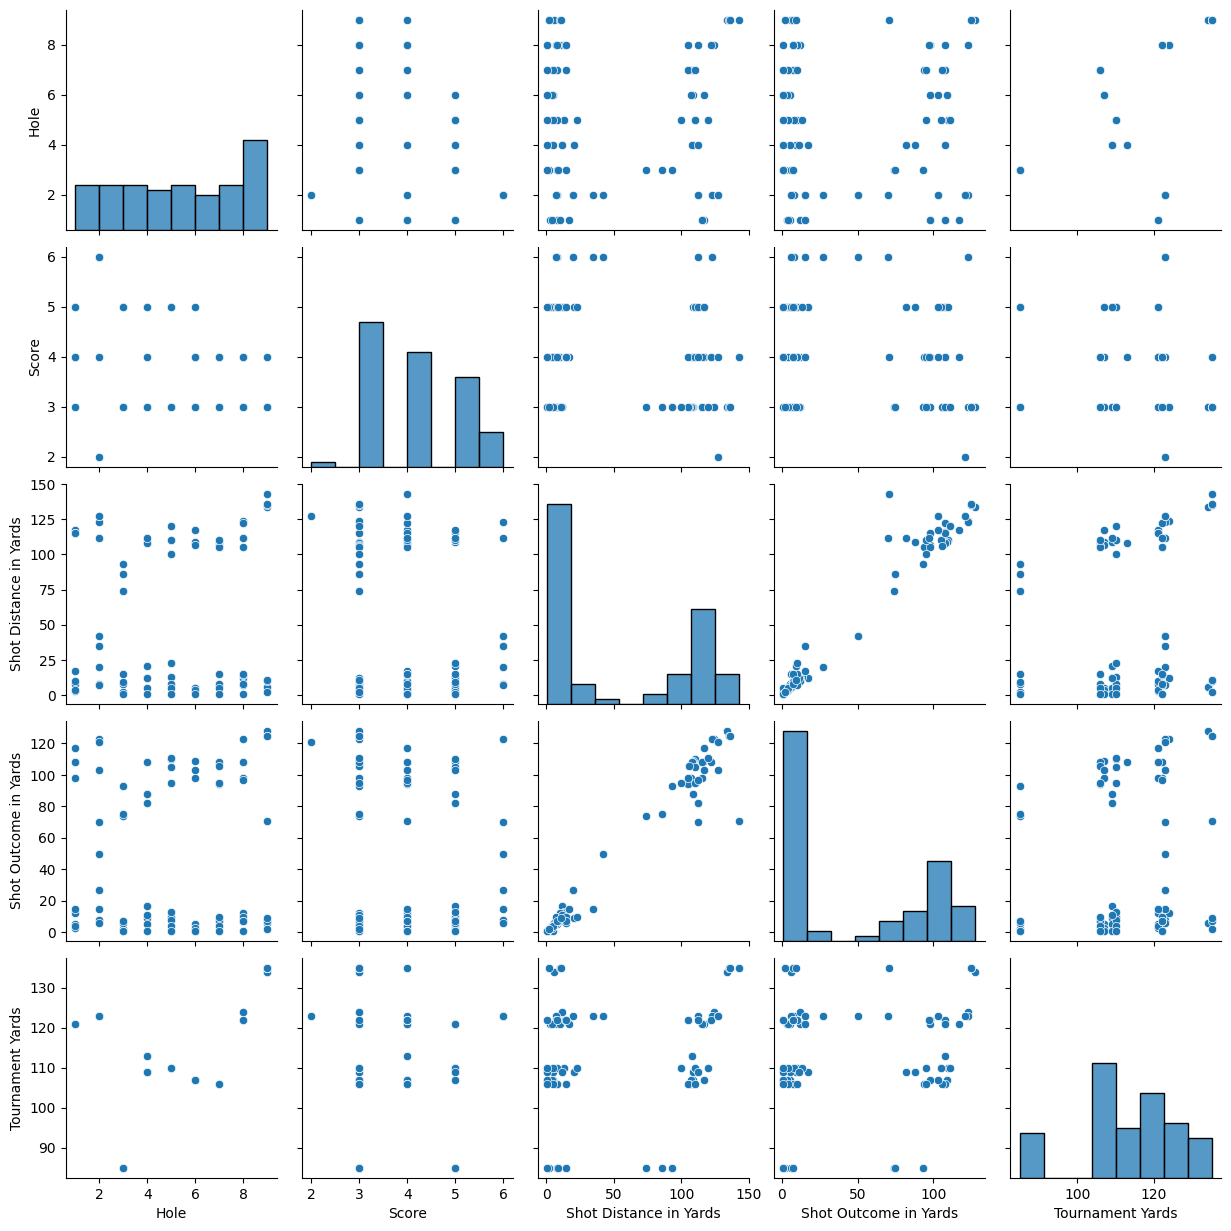

In [53]:
# pairplot
sns.pairplot(data)